/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: Mean of empty slice
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:73: RuntimeWarning: Mean of empty 

Text(0.5, 1.0, 'bestID=19')

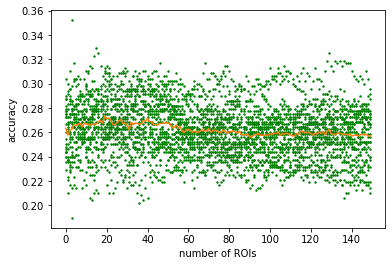

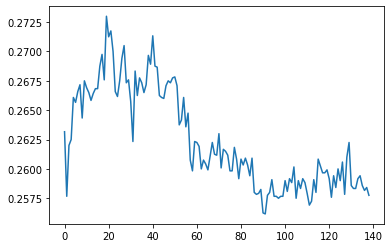

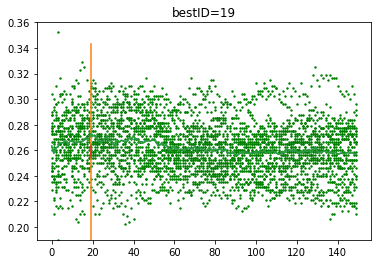

In [2]:
# code to load and compare the result of above:
from glob import glob
import numpy as np
# di="/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/subjects/"
# subs=glob(f"{di}[0,1]*_neurosketch")
# subs=[sub.split("/")[-1].split("_")[0] for sub in subs]
# subjects=""
# for sub in subs:
#     subjects=subjects+sub+" "


testDir='/gpfs/milgram/project/turk-browne/projects/rtTest/'
subjects_correctly_aligned=['1206161','0119173','1206162','1130161','1206163','0120171','0111171','1202161','0125172','0110172','0123173','0120173','0110171','0119172','0124171','0123171','1203161','0118172','0118171','0112171','1207162','0117171','0119174','0112173','0112172']
subs=subjects_correctly_aligned
subjects=subs #["0110171", "0110172", "0111171"]
hemis=["lh", "rh"]
tag="FSatlas"
wangAcc=np.zeros((50,len(subs)))
# roiloc="wang2014"
# for sub_i,sub in enumerate(subjects):
#     for num in range(1,51):
#         # try:
#         wangAcc[num-1,sub_i]=np.load(f"{testDir}{roiloc}/{sub}/output/uniMaskRank_{tag}_top{num}.npy")
#         # print(f"{roiloc} {sub} {num} ROIs acc={wangAcc[num-1,sub_i]}")
#         # except:
#         #     pass

schaeferAcc=np.zeros((300,len(subs)))
roiloc="FSatlas"
for sub_i,sub in enumerate(subjects):
    for num in range(1,301):
        try:
            schaeferAcc[num-1,sub_i]=np.load(f"{testDir}{roiloc}/{sub}/output/uniMaskRank_{tag}_top{num}.npy")
        # print(f"{roiloc} {sub} {num} ROIs acc={schaeferAcc[num-1,sub_i]}")
        except:
            pass


wangAcc=wangAcc[:,wangAcc[0]!=0]
schaeferAcc=schaeferAcc[:,schaeferAcc[0]!=0]
schaeferAcc[schaeferAcc==0]=None

import matplotlib.pyplot as plt
plt.plot(np.nanmean(wangAcc,axis=1))
plt.plot(np.nanmean(schaeferAcc,axis=1))


for i in range(schaeferAcc.shape[0]):
    plt.scatter([i]*schaeferAcc.shape[1],schaeferAcc[i],c='g',s=2)
for i in range(wangAcc.shape[0]):
    plt.scatter([i]*wangAcc.shape[1],wangAcc[i],c='b',s=2)

plt.xlabel("number of ROIs")
plt.ylabel("accuracy")
# plt.savefig('SummaryAccuracy.png')


plt.figure()
plt.plot(np.mean(schaeferAcc,axis=1))
plt.plot(np.mean(wangAcc,axis=1))


schaeferAcc_mean=np.mean(schaeferAcc,axis=1)
bestID=np.where(schaeferAcc_mean==np.nanmax(schaeferAcc_mean))[0][0]
_=plt.figure()
for i in range(schaeferAcc.shape[0]):
    plt.scatter([i]*schaeferAcc.shape[1],schaeferAcc[i],c='g',s=2)
plt.plot(np.arange(schaeferAcc.shape[0]),np.nanmean(schaeferAcc,axis=1))
plt.ylim([0.19,0.36])
plt.plot([bestID]*10,np.arange(0.19,0.36,(0.36-0.19)/10))


plt.plot(np.arange(schaeferAcc.shape[0]),np.nanmean(schaeferAcc,axis=1))
plt.plot([bestID]*10,np.arange(0.255,0.264,(0.264-0.255)/10))
plt.title(f"bestID={bestID}")


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: Mean of empty slice


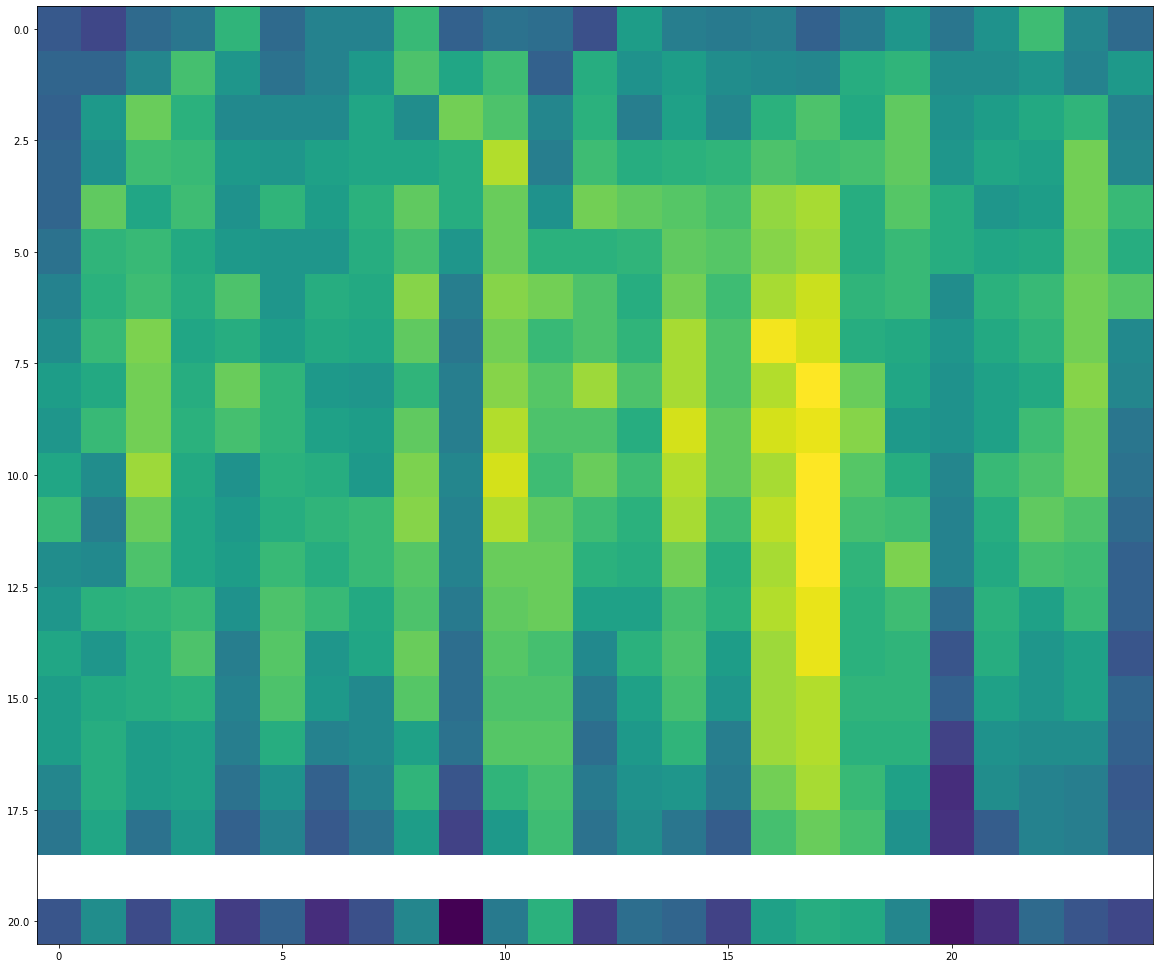

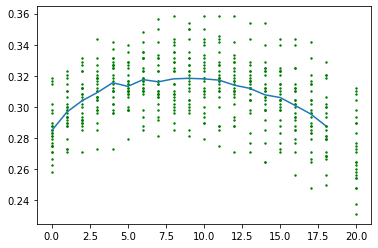

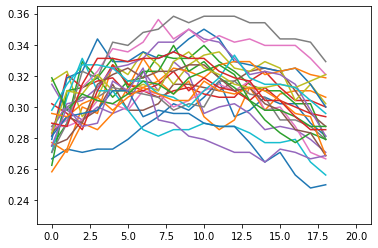

In [7]:
import os
os.chdir("/gpfs/milgram/project/turk-browne/projects/rtTest/kp_scratch/")
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle5 as pickle
import subprocess
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
roiloc="FSatlas"
dataSource="neurosketch"
# subjects=glob("./wang2014/[0,1]*")
# subjects=[subject.split("/")[-1] for subject in subjects]
subjects_correctly_aligned=['1206161','0119173','1206162','1130161','1206163','0120171','0111171','1202161','0125172','0110172','0123173','0120173','0110171','0119172','0124171','0123171','1203161','0118172','0118171','0112171','1207162','0117171','0119174','0112173','0112172']
subjects=subjects_correctly_aligned
N=20
workingPath="/gpfs/milgram/project/turk-browne/projects/rtTest/"
GreedyBestAcc=np.zeros((len(subjects),N+1))
GreedyBestAcc[GreedyBestAcc==0]=None
for ii,subject in enumerate(subjects):
    try:
        GreedyBestAcc[ii,N]=np.load(workingPath+f"./{roiloc}/{subject}/output/uniMaskRank_{tag}_top{N}.npy")
    except:
        pass

    for len_topN_1 in range(N-1,0,-1):
        # Wait(f"./tmp/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}.pkl")
        try:
            # print(f"./tmp/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}")
            di = load_obj(f"./tmp__folder_{tag}/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}")
            GreedyBestAcc[ii,len_topN_1-1] = di['bestAcc']
        except:
            pass
GreedyBestAcc=GreedyBestAcc.T
plt.figure(figsize = (20,20))
# plt.imshow(random.rand(8, 90), interpolation='nearest')
plt.imshow(GreedyBestAcc, interpolation='nearest')
_=plt.figure()
for i in range(GreedyBestAcc.shape[0]):
    plt.scatter([i]*GreedyBestAcc.shape[1],GreedyBestAcc[i],c='g',s=2)
plt.plot(np.arange(GreedyBestAcc.shape[0]),np.nanmean(GreedyBestAcc,axis=1))
# plt.ylim([0.19,0.36])
# plt.xlabel("number of ROIs")
# plt.ylabel("accuracy")


_=plt.figure()
for j in range(GreedyBestAcc.shape[1]):
    plt.plot(GreedyBestAcc[:,j])

for i,sub in enumerate(subjects):
    if np.isnan(GreedyBestAcc[:,i][0]):
        print(f"sbatch --requeue aggregate_greedy.sh {sub} neurosketch schaefer2018 78")



In [5]:
tag

'FSatlas'

/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Text(0.5, 1.0, 'bestID=77')

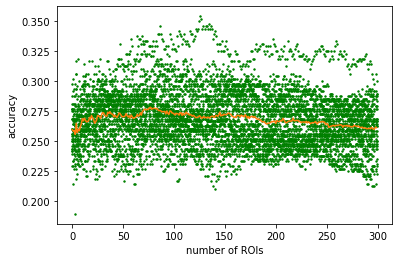

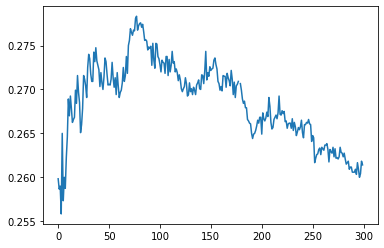

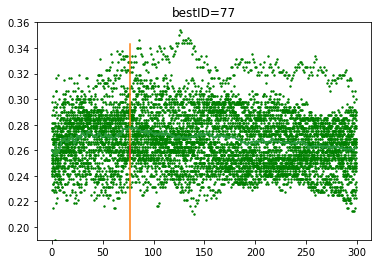

In [1]:
# code to load and compare the result of above:
from glob import glob
import numpy as np
# di="/gpfs/milgram/project/turk-browne/jukebox/ntb/projects/sketchloop02/subjects/"
# subs=glob(f"{di}[0,1]*_neurosketch")
# subs=[sub.split("/")[-1].split("_")[0] for sub in subs]
# subjects=""
# for sub in subs:
#     subjects=subjects+sub+" "


testDir='/gpfs/milgram/project/turk-browne/projects/rtTest/'
subjects_correctly_aligned=['1206161','0119173','1206162','1130161','1206163','0120171','0111171','1202161','0125172','0110172','0123173','0120173','0110171','0119172','0124171','0123171','1203161','0118172','0118171','0112171','1207162','0117171','0119174','0112173','0112172']
subs=subjects_correctly_aligned
subjects=subs #["0110171", "0110172", "0111171"]
hemis=["lh", "rh"]
tag="GM"
wangAcc=np.zeros((50,len(subs)))
# roiloc="wang2014"
# for sub_i,sub in enumerate(subjects):
#     for num in range(1,51):
#         # try:
#         wangAcc[num-1,sub_i]=np.load(f"{testDir}{roiloc}/{sub}/output/uniMaskRank_{tag}_top{num}.npy")
#         # print(f"{roiloc} {sub} {num} ROIs acc={wangAcc[num-1,sub_i]}")
#         # except:
#         #     pass

schaeferAcc=np.zeros((300,len(subs)))
roiloc="schaefer2018"
for sub_i,sub in enumerate(subjects):
    for num in range(1,301):
        try:
            schaeferAcc[num-1,sub_i]=np.load(f"{testDir}{roiloc}/{sub}/output/uniMaskRank_{tag}_top{num}.npy")
        # print(f"{roiloc} {sub} {num} ROIs acc={schaeferAcc[num-1,sub_i]}")
        except:
            pass


wangAcc=wangAcc[:,wangAcc[0]!=0]
schaeferAcc=schaeferAcc[:,schaeferAcc[0]!=0]
schaeferAcc[schaeferAcc==0]=None

import matplotlib.pyplot as plt
plt.plot(np.nanmean(wangAcc,axis=1))
plt.plot(np.nanmean(schaeferAcc,axis=1))


for i in range(schaeferAcc.shape[0]):
    plt.scatter([i]*schaeferAcc.shape[1],schaeferAcc[i],c='g',s=2)
for i in range(wangAcc.shape[0]):
    plt.scatter([i]*wangAcc.shape[1],wangAcc[i],c='b',s=2)

plt.xlabel("number of ROIs")
plt.ylabel("accuracy")
# plt.savefig('SummaryAccuracy.png')


plt.figure()
plt.plot(np.mean(schaeferAcc,axis=1))
plt.plot(np.mean(wangAcc,axis=1))


schaeferAcc_mean=np.mean(schaeferAcc,axis=1)
bestID=np.where(schaeferAcc_mean==np.nanmax(schaeferAcc_mean))[0][0]
_=plt.figure()
for i in range(schaeferAcc.shape[0]):
    plt.scatter([i]*schaeferAcc.shape[1],schaeferAcc[i],c='g',s=2)
plt.plot(np.arange(schaeferAcc.shape[0]),np.nanmean(schaeferAcc,axis=1))
plt.ylim([0.19,0.36])
plt.plot([bestID]*10,np.arange(0.19,0.36,(0.36-0.19)/10))


plt.plot(np.arange(schaeferAcc.shape[0]),np.nanmean(schaeferAcc,axis=1))
plt.plot([bestID]*10,np.arange(0.255,0.264,(0.264-0.255)/10))
plt.title(f"bestID={bestID}")


In [5]:
import pickle5 as pickle
import subprocess
from subprocess import call
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
a=load_obj("/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/expScripts/recognition/top31ROIs")
a


['236.nii.gz',
 '275.nii.gz',
 '213.nii.gz',
 '272.nii.gz',
 '33.nii.gz',
 '16.nii.gz',
 '92.nii.gz',
 '164.nii.gz',
 '17.nii.gz',
 '23.nii.gz',
 '223.nii.gz',
 '130.nii.gz',
 '80.nii.gz',
 '125.nii.gz',
 '262.nii.gz',
 '20.nii.gz',
 '37.nii.gz',
 '155.nii.gz',
 '91.nii.gz',
 '221.nii.gz',
 '36.nii.gz',
 '65.nii.gz',
 '171.nii.gz',
 '61.nii.gz',
 '176.nii.gz',
 '159.nii.gz',
 '105.nii.gz',
 '212.nii.gz',
 '107.nii.gz',
 '28.nii.gz',
 '78.nii.gz']

In [34]:
N=78
workingDir="/gpfs/milgram/project/turk-browne/projects/rtTest/"

# '1201161', '1121161','0115172','0112174' #these subject have nothing in output folder
subjects_correctly_aligned=['1206161','0119173','1206162','1130161','1206163','0120171','0111171','1202161','0125172','0110172','0123173','0120173','0110171','0119172','0124171','0123171','1203161','0118172','0118171','0112171','1207162','0117171','0119174','0112173','0112172']
if roiloc == "schaefer2018":
    RESULT=np.zeros((len(subjects_correctly_aligned),300))
    topN = []
    for ii,sub in enumerate(subjects_correctly_aligned):
        outloc = workingDir+"/{}/{}/output".format(roiloc, sub)
        for roinum in range(1,301):
            try: # 这里之所以要“try”是因为有的Schaefer ROI在被GM mask之后的voxel数目变成了0
                result = np.load(f"{outloc}/{roinum}_{tag}.npy")
                RESULT[ii,roinum-1]=result
            except:
                pass
            # RESULT = result if roinum == 1 else np.vstack((RESULT, result))
    RESULT = np.nanmean(RESULT,axis=0)
    print(f"RESULT.shape={RESULT.shape}")
    RESULTix = RESULT[:].argsort()[-N:]
    for idx in RESULTix:
        topN.append(f"{idx+1}.nii.gz")
        print(topN[-1])
save_obj(topN,"/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/expScripts/recognition/top78ROIs")

RESULT.shape=(300,)
234.nii.gz
19.nii.gz
225.nii.gz
8.nii.gz
86.nii.gz
223.nii.gz
159.nii.gz
240.nii.gz
148.nii.gz
120.nii.gz
195.nii.gz
114.nii.gz
222.nii.gz
179.nii.gz
65.nii.gz
272.nii.gz
235.nii.gz
163.nii.gz
56.nii.gz
77.nii.gz
108.nii.gz
76.nii.gz
284.nii.gz
139.nii.gz
295.nii.gz
166.nii.gz
271.nii.gz
40.nii.gz
164.nii.gz
258.nii.gz
151.nii.gz
80.nii.gz
89.nii.gz
41.nii.gz
214.nii.gz
132.nii.gz
249.nii.gz
49.nii.gz
259.nii.gz
112.nii.gz
21.nii.gz
126.nii.gz
58.nii.gz
237.nii.gz
218.nii.gz
190.nii.gz
186.nii.gz
93.nii.gz
67.nii.gz
10.nii.gz
209.nii.gz
211.nii.gz
230.nii.gz
265.nii.gz
52.nii.gz
146.nii.gz
205.nii.gz
2.nii.gz
238.nii.gz
133.nii.gz
220.nii.gz
263.nii.gz
204.nii.gz
150.nii.gz
39.nii.gz
62.nii.gz
281.nii.gz
160.nii.gz
246.nii.gz
243.nii.gz
280.nii.gz
87.nii.gz
22.nii.gz
193.nii.gz
244.nii.gz
53.nii.gz
30.nii.gz
79.nii.gz


In [29]:
print(max(RESULT))
RESULT[235]

0.25983333333333336


0.2520833333333333

In [30]:
np.where(RESULT==max(RESULT))

(array([78]),)

In [33]:
save_obj(topN,"/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/expScripts/recognition/top78ROIs")

In [42]:


import os
import sys
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/')
import argparse
import numpy as np
import nibabel as nib
import scipy.io as sio
import subprocess
from scipy.stats import zscore
from nibabel.nicom import dicomreaders
import pydicom as dicom  # type: ignore
import time
from glob import glob
import shutil
from nilearn.image import new_img_like
import joblib
import rtCommon.utils as utils
from rtCommon.utils import loadConfigFile
import pickle5 as pickle
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
# from rtCommon.fileClient import FileInterface
# import rtCommon.projectUtils as projUtils
# from rtCommon.imageHandling import readRetryDicomFromFileInterface, getDicomFileName, convertDicomImgToNifti


argParser = argparse.ArgumentParser()
argParser.add_argument('--config', '-c', default='sub001.ses1.toml', type=str, help='experiment file (.json or .toml)')
argParser.add_argument('--skipPre', '-s', default=0, type=int, help='skip preprocess or not')
argParser.add_argument('--skipGreedy', '-g', default=0, type=int, help='skip greedy or not')
args = argParser.parse_args("")
from rtCommon.cfg_loading import mkdir,cfg_loading
# config="sub001.ses2.toml"
cfg = cfg_loading(args.config)


toml filename=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/projects/rtSynth_rt/conf/sub001.ses1.toml


In [ ]:

def greedyMask(cfg,N=78): # N used to be 31, 25
    '''
    purpose:
        starting from N ROIs, get the best performed ROI combination in a greedy way
        this code is aggregate_greedy.py adapted to match rtcloud
    steps:
        load the N ROIs from result of neurosketch dataset
        train the model using the NROIs and get the accuracy.

        get the N combinations of N-1 ROIs
        retrain the model and get the accuracy for these N combinations

        get the N-1 combinations of N-2 ROIs
        retrain the model and get the accuracy for these N-1 combinations

        when everything is finished, find the best ROI and save as cfg.chosenMask
        
    '''
    import os
    print(f"conda env={os.environ['CONDA_DEFAULT_ENV']}") 
    import numpy as np
    import nibabel as nib
    import sys
    sys.path.append('/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/')
    import time
    import pandas as pd
    from sklearn.linear_model import LogisticRegression
    import itertools
    # from tqdm import tqdm
    import pickle5 as pickle
    import subprocess
    from subprocess import call
    def save_obj(obj, name):
        with open(name + '.pkl', 'wb') as f:
            pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

    def load_obj(name):
        with open(name + '.pkl', 'rb') as f:
            return pickle.load(f)

    # What subject are you running
    '''
    Takes args (in order):
        subject (e.g. sub001)
        dataSource (e.g. realtime)
        roiloc (wang2014 or schaefer2018)
        N (the number of parcels or ROIs to start with)
    '''


    from rtCommon.cfg_loading import mkdir,cfg_loading
    config="sub001.ses1.toml"
    cfg = cfg_loading(config)

    subject,dataSource,roiloc,N=cfg.subjectName,"realtime","schaefer2018",N
    # subject,dataSource,roiloc,N=sys.argv[1],sys.argv[2],sys.argv[3],int(sys.argv[4])

    print("Running subject {}, with {} as a data source, {}, starting with {} ROIs".format(subject, dataSource, roiloc, N))

    funcdata = cfg.recognition_dir + "brain_run{run}.npy"
    metadata = cfg.recognition_dir + "behav_run{run}.csv"

    workingDir="/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/subjects/sub001/ses1/recognition"

    topN = load_obj(f"{cfg.recognition_expScripts_dir}top{N}ROIs")
    print(f"len(topN)={len(topN)}")
    print(f"topN={topN}")

    def Wait(waitfor, delay=1):
        while not os.path.exists(waitfor):
            time.sleep(delay)
            print('waiting for {}'.format(waitfor))

    imcodeDict={"A": "bed", "B": "Chair", "C": "table", "D": "bench"}

    def getMask(topN, cfg):
        for pn, parc in enumerate(topN):
            _mask = nib.load(cfg.recognition_dir+"mask/GMschaefer_{}".format(parc))
            # schaefer_56.nii.gz
            aff = _mask.affine
            _mask = _mask.get_data()
            _mask = _mask.astype(int)
            # say some things about the mask.
            mask = _mask if pn == 0 else mask + _mask
            mask[mask>0] = 1
        return mask

    mask=getMask(topN, cfg)

    print('mask dimensions: {}'. format(mask.shape))
    print('number of voxels in mask: {}'.format(np.sum(mask)))


    runRecording = pd.read_csv(f"{cfg.recognition_dir}../runRecording.csv")
    actualRuns = list(runRecording['run'].iloc[list(np.where(1==1*(runRecording['type']=='recognition'))[0])]) # can be [1,2,3,4,5,6,7,8] or [1,2,4,5]
    if len(actualRuns) < 8:
        runRecording_preDay = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/../runRecording.csv")
        actualRuns_preDay = list(runRecording_preDay['run'].iloc[list(np.where(1==1*(runRecording_preDay['type']=='recognition'))[0])])[-(8-len(actualRuns)):] # might be [5,6,7,8]
    else: 
        actualRuns_preDay = []

    # assert len(actualRuns_preDay)+len(actualRuns)==8 
    if len(actualRuns_preDay)+len(actualRuns)<8:
        runRecording_prepreDay = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-2}/recognition/../runRecording.csv")
        actualRuns_prepreDay = list(runRecording_prepreDay['run'].iloc[list(np.where(1==1*(runRecording_prepreDay['type']=='recognition'))[0])])[-(8-len(actualRuns)-len(actualRuns_preDay)):] # might be [5,6,7,8]
    else:
        actualRuns_prepreDay = []

    objects = ['bed', 'bench', 'chair', 'table']

    brain_data=[]
    behav_data=[]
    for ii,run in enumerate(actualRuns): # load behavior and brain data for current session
        t = np.load(f"{cfg.recognition_dir}brain_run{run}.npy")
        t = normalize(t)
        brain_data.append(t)

        t = pd.read_csv(f"{cfg.recognition_dir}behav_run{run}.csv")
        t=list(t['Item'])
        behav_data.append(t)

    for ii,run in enumerate(actualRuns_preDay): # load behavior and brain data for previous session
        t = np.load(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/brain_run{run}.npy")
        t = normalize(t)
        brain_data.append(t)

        t = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/behav_run{run}.csv")
        t=list(t['Item'])
        behav_data.append(t)
    for ii,run in enumerate(actualRuns_prepreDay): # load behavior and brain data for previous session
        t = np.load(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-2}/recognition/brain_run{run}.npy")
        t = normalize(t)
        brain_data.append(t)

        t = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-2}/recognition/behav_run{run}.csv")
        t=list(t['Item'])
        behav_data.append(t)

    save_obj([brain_data,behav_data],f"{cfg.projectDir}tmp__folder/{subject}_{dataSource}_{roiloc}_{N}") #{len(topN)}_{i}

    def wait(tmpFile):
        while not os.path.exists(tmpFile+'_result.npy'):
            time.sleep(5)
            print(f"waiting for {tmpFile}_result.npy\n")
        return np.load(tmpFile+'_result.npy')

    def numOfRunningJobs():
        # subprocess.Popen(['squeue -u kp578 | wc -l > squeue.txt'],shell=True) # sl_result = Class(_runs, bcvar)
        randomID=str(time.time())
        # print(f"squeue -u kp578 | wc -l > squeue/{randomID}.txt")
        call(f'squeue -u kp578 | wc -l > {cfg.projectDir}squeue/{randomID}.txt',shell=True)
        numberOfJobsRunning = int(open(f"{cfg.projectDir}squeue/{randomID}.txt", "r").read())
        print(f"numberOfJobsRunning={numberOfJobsRunning}")
        return numberOfJobsRunning

    def Class(brain_data,behav_data):
        # metas = bcvar[0]
        # data4d = data[0]
        print([t.shape for t in brain_data])

        accs = []
        for run in range(8):
            testX = brain_data[run]
            testY = behav_data[run]

            trainX=np.zeros((1,1))
            for i in range(8):
                if i !=run:
                    trainX=brain_data[i] if trainX.shape==(1,1) else np.concatenate((trainX,brain_data[i]),axis=0)

            trainY = []
            for i in range(8):
                if i != run:
                    trainY.extend(behav_data[i])
            clf = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=1000, 
                                    multi_class='multinomial').fit(trainX, trainY)
                    
            # Monitor progress by printing accuracy (only useful if you're running a test set)
            acc = clf.score(testX, testY)
            accs.append(acc)
        
        return np.mean(accs)

    if not os.path.exists(f"{cfg.projectDir}tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{len(topN)}.pkl"):
        brain_data = [t[:,mask==1] for t in brain_data]
        # _runs = [runs[:,mask==1]]
        print("Runs shape", [t.shape for t in brain_data])
        slstart = time.time()
        sl_result = Class(brain_data, behav_data)
        print(f"passed {time.time()-slstart}s for training")
        save_obj({"subject":subject,
        "startFromN":N,
        "currNumberOfROI":len(topN),
        "bestAcc":sl_result, # this is the sl_result for the topN, not the bestAcc, bestAcc is for the purpose of keeping consistent with others
        "bestROIs":topN},# this is the topN, not the bestROIs, bestROIs is for the purpose of keeping consistent with others
        f"{cfg.projectDir}tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{len(topN)}"
        )
    # ./tmp__folder/0125171_40_schaefer2018_neurosketch_39.pkl
    if os.path.exists(f"{cfg.projectDir}tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{1}.pkl"):
        print(f"{cfg.projectDir}tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_1.pkl exists")
        raise Exception('runned or running')

    # N-1
    def next(topN):
        print(f"len(topN)={len(topN)}")
        print(f"topN={topN}")

        if len(topN)==1:
            return None
        else:
            allpairs = itertools.combinations(topN,len(topN)-1)
            topNs=[]
            sl_results=[]
            tmpFiles=[]
            while os.path.exists(f"{cfg.projectDir}tmp__folder/holdon.npy"):
                time.sleep(10)
                print("sleep for 10s ; waiting for ./tmp__folder/holdon.npy to be deleted")
            np.save(f"{cfg.projectDir}tmp__folder/holdon",1)

            # 对于每一个round，提交一个job array，然后等待这个job array完成之后再进行下一轮
            # 具体的方法是首先保存需要的input，也就是这一轮需要用到的tmpFile，然后再将tmpFile除了之外的字符串输入
            skip_flag=0
            for i,_topN in enumerate(allpairs):
                tmpFile=f"{cfg.projectDir}tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{len(topN)}_{i}"
                print(f"tmpFile={tmpFile}")
                topNs.append(_topN)
                tmpFiles.append(tmpFile)

                if not os.path.exists(tmpFile+'_result.npy'):
                    # prepare brain data(runs) mask and behavior data(bcvar) 

                    save_obj([_topN,subject,dataSource,roiloc,N], tmpFile)

                    # print("kp2")
                    # numberOfJobsRunning = numOfRunningJobs()
                    # print("kp3")
                    # while numberOfJobsRunning > 400: # 300 is not filling it up
                    #     print("kp4 300")
                    #     print("waiting 10, too many jobs running") ; time.sleep(10)
                    #     numberOfJobsRunning = numOfRunningJobs()
                    #     print("kp5")

                    # get the evidence for the current mask
                    # cmd=f'sbatch --requeue {cfg.recognition_expScripts_dir}class.sh {tmpFile}'
                    # print(cmd)
                    # proc = subprocess.Popen([cmd],shell=True) # sl_result = Class(_runs, bcvar) 
                    # print("kp6")
                else:
                    print(tmpFile+'_result.npy exists!')
                    skip_flag+=1

            if skip_flag!=(i+1): # 如果有一个不存在，就需要跑一跑
                command=f'sbatch --array=1-{i+1} {cfg.recognition_expScripts_dir}class.sh ./tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{len(topN)}_'
                print(command)
                proc = subprocess.Popen([command], shell=True) # sl_result = Class(_runs, bcvar) 
            else:
                command=f'sbatch --array=1-{i+1} {cfg.recognition_expScripts_dir}class.sh ./tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{len(topN)}_'
                print(f"skip {command}")

            os.remove(f"{cfg.projectDir}tmp__folder/holdon.npy")

            # wait for everything to be finished and make a summary to find the best performed megaROI
            sl_results=[]
            for tmpFile in tmpFiles:
                sl_result=wait(tmpFile)
                sl_results.append(sl_result)
            print(f"sl_results={sl_results}")
            print(f"max(sl_results)=={max(sl_results)}")
            maxID=np.where(sl_results==max(sl_results))[0][0]
            save_obj({"subject":subject,
            "startFromN":N,
            "currNumberOfROI":len(topN)-1,
            "bestAcc":max(sl_results),
            "bestROIs":topNs[maxID]},
            f"{cfg.projectDir}tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{len(topN)-1}"
            )
            print(f"bestAcc={max(sl_results)} For {len(topN)-1} = {cfg.projectDir}tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{len(topN)-1}")
            tmpFiles=next(topNs[maxID])
            return 0
    tmpFiles=next(topN)



    # when every mask has run, find the best mask and save as the chosenMask
    roiloc="schaefer2018"
    dataSource="realtime"
    subjects=[cfg.subjectName]
    N=N
    GreedyBestAcc=np.zeros((len(subjects),N+1))
    GreedyBestAcc[GreedyBestAcc==0]=None
    for ii,subject in enumerate(subjects):
    #     try:
    #         GreedyBestAcc[ii,40]=np.load("./{}/{}/output/top{}.npy".format(roiloc, subject, N))
    #     except:
    #         pass
        for len_topN_1 in range(N-1,0,-1):
            try:
                # print(f"./tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}")
                di = load_obj(f"./tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{len_topN_1}")
                GreedyBestAcc[ii,len_topN_1-1] = di['bestAcc']
            except:
                pass
    GreedyBestAcc=GreedyBestAcc.T

    # plt.imshow(GreedyBestAcc)
    # _=plt.figure()
    # for i in range(GreedyBestAcc.shape[0]):
    #     plt.scatter([i]*GreedyBestAcc.shape[1],GreedyBestAcc[i],c='g',s=2)
    # plt.plot(np.arange(GreedyBestAcc.shape[0]),np.nanmean(GreedyBestAcc,axis=1))

    performance_mean = np.nanmean(GreedyBestAcc,axis=1)
    bestID=np.where(performance_mean==max(performance_mean))[0][0]
    di = load_obj(f"./tmp__folder/{subject}_{N}_{roiloc}_{dataSource}_{bestID+1}")
    mask = getMask(di['bestROIs'],cfg)
    np.save(cfg.chosenMask,mask)
    return 0
sys.path.append('/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/expScripts/recognition/')
# from recognition_dataAnalysisFunctions import recognition_preprocess,minimalClass,behaviorDataLoading,greedyMask,normalize,classifierEvidence
def wait(waitfor, delay=1):
    while not os.path.exists(waitfor):
        time.sleep(delay)
        print('waiting for {}'.format(waitfor))

'''
convert all dicom files into nii files in the temp dir. 
find the middle volume of the run1 as the template volume
align every other functional volume with templateFunctionalVolume (3dvolreg)
'''
if 0:
    recognition_preprocess(cfg) #somehow this cannot be run in jupyter


'''
run the mask selection
    make ROIs
        make-schaefer-rois.sh
    starting from 31 megaROIs use greedyMask to find best ROI for the current subject
'''
# make ROIs
if cfg.session==1:
    if not os.path.exists(f"{cfg.recognition_dir}mask/GMschaefer_300.nii.gz"):
        print(f"running sbatch {cfg.recognition_expScripts_dir}make-schaefer-rois.sh {cfg.subjectName} {cfg.recognition_dir}")
        subprocess.Popen(f"sbatch {cfg.recognition_expScripts_dir}make-schaefer-rois.sh {cfg.subjectName} {cfg.recognition_dir}",shell=True)
        wait(f"{cfg.recognition_dir}mask/GMschaefer_300.nii.gz")

    # when this is the first session, you need to select the chosenMask
    # python expScripts/recognition/greedyMask.py
    if not args.skipGreedy:
        print("running greedyMask")
        greedyMask(cfg)

running greedyMask
conda env=/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud
toml filename=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/projects/rtSynth_rt/conf/sub001.ses1.toml
Running subject sub001, with realtime as a data source, schaefer2018, starting with 78 ROIs
len(topN)=78
topN=['234.nii.gz', '19.nii.gz', '225.nii.gz', '8.nii.gz', '86.nii.gz', '223.nii.gz', '159.nii.gz', '240.nii.gz', '148.nii.gz', '120.nii.gz', '195.nii.gz', '114.nii.gz', '222.nii.gz', '179.nii.gz', '65.nii.gz', '272.nii.gz', '235.nii.gz', '163.nii.gz', '56.nii.gz', '77.nii.gz', '108.nii.gz', '76.nii.gz', '284.nii.gz', '139.nii.gz', '295.nii.gz', '166.nii.gz', '271.nii.gz', '40.nii.gz', '164.nii.gz', '258.nii.gz', '151.nii.gz', '80.nii.gz', '89.nii.gz', '41.nii.gz', '214.nii.gz', '132.nii.gz', '249.nii.gz', '49.nii.gz', '259.nii.gz', '112.nii.gz', '21.nii.gz', '126.nii.gz', '58.nii.gz', '237.nii.gz', '218.nii.gz', '190.nii.gz', '186.nii.gz', '93.nii.gz', '67.nii.gz', '10.nii.gz', '209.nii

/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/ipykernel_launcher.py:81: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


mask dimensions: (64, 64, 36)
number of voxels in mask: 5053


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


len(topN)=78
topN=['234.nii.gz', '19.nii.gz', '225.nii.gz', '8.nii.gz', '86.nii.gz', '223.nii.gz', '159.nii.gz', '240.nii.gz', '148.nii.gz', '120.nii.gz', '195.nii.gz', '114.nii.gz', '222.nii.gz', '179.nii.gz', '65.nii.gz', '272.nii.gz', '235.nii.gz', '163.nii.gz', '56.nii.gz', '77.nii.gz', '108.nii.gz', '76.nii.gz', '284.nii.gz', '139.nii.gz', '295.nii.gz', '166.nii.gz', '271.nii.gz', '40.nii.gz', '164.nii.gz', '258.nii.gz', '151.nii.gz', '80.nii.gz', '89.nii.gz', '41.nii.gz', '214.nii.gz', '132.nii.gz', '249.nii.gz', '49.nii.gz', '259.nii.gz', '112.nii.gz', '21.nii.gz', '126.nii.gz', '58.nii.gz', '237.nii.gz', '218.nii.gz', '190.nii.gz', '186.nii.gz', '93.nii.gz', '67.nii.gz', '10.nii.gz', '209.nii.gz', '211.nii.gz', '230.nii.gz', '265.nii.gz', '52.nii.gz', '146.nii.gz', '205.nii.gz', '2.nii.gz', '238.nii.gz', '133.nii.gz', '220.nii.gz', '263.nii.gz', '204.nii.gz', '150.nii.gz', '39.nii.gz', '62.nii.gz', '281.nii.gz', '160.nii.gz', '246.nii.gz', '243.nii.gz', '280.nii.gz', '87.nii.gz

tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_76_45
/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_76_45_result.npy exists!
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_76_46
/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_76_46_result.npy exists!
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_76_47
/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_76_47_result.npy exists!
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_76_48
/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_76_48_result.npy exists!
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_r

/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_73_47_result.npy exists!
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_73_48
/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_73_48_result.npy exists!
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_73_49
/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_73_49_result.npy exists!
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_73_50
/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_73_50_result.npy exists!
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_73_51
/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__f

sl_results=[array(0.4453125), array(0.44270833), array(0.4453125), array(0.4453125), array(0.45052083), array(0.4375), array(0.4375), array(0.44791667), array(0.44270833), array(0.4453125), array(0.44270833), array(0.44010417), array(0.45572917), array(0.44270833), array(0.44270833), array(0.43229167), array(0.44791667), array(0.45052083), array(0.4375), array(0.4375), array(0.4453125), array(0.44010417), array(0.43229167), array(0.43229167), array(0.4453125), array(0.39583333), array(0.44270833), array(0.4453125), array(0.44791667), array(0.45572917), array(0.44270833), array(0.44791667), array(0.4375), array(0.44270833), array(0.4375), array(0.45052083), array(0.44270833), array(0.4375), array(0.4453125), array(0.44791667), array(0.44010417), array(0.4375), array(0.44270833), array(0.44791667), array(0.4296875), array(0.44010417), array(0.43489583), array(0.42708333), array(0.45052083), array(0.44270833), array(0.44010417), array(0.453125), array(0.44791667), array(0.453125), array(0

sl_results=[array(0.4609375), array(0.45052083), array(0.45572917), array(0.453125), array(0.45833333), array(0.4453125), array(0.4609375), array(0.4453125), array(0.45052083), array(0.4453125), array(0.4453125), array(0.44791667), array(0.4453125), array(0.4453125), array(0.46875), array(0.44791667), array(0.45572917), array(0.44791667), array(0.44270833), array(0.45052083), array(0.4609375), array(0.453125), array(0.44791667), array(0.453125), array(0.44791667), array(0.3828125), array(0.44270833), array(0.45052083), array(0.45052083), array(0.4453125), array(0.45052083), array(0.4609375), array(0.44791667), array(0.44791667), array(0.45572917), array(0.45572917), array(0.45052083), array(0.46354167), array(0.45052083), array(0.44010417), array(0.45052083), array(0.44010417), array(0.45052083), array(0.45572917), array(0.45052083), array(0.44270833), array(0.453125), array(0.45572917), array(0.45833333), array(0.45052083), array(0.453125), array(0.453125), array(0.41927083), array(0.

sl_results=[array(0.46614583), array(0.46354167), array(0.453125), array(0.47395833), array(0.4453125), array(0.46354167), array(0.46875), array(0.453125), array(0.453125), array(0.45052083), array(0.46354167), array(0.45833333), array(0.45572917), array(0.45052083), array(0.47395833), array(0.45052083), array(0.4609375), array(0.4609375), array(0.4609375), array(0.46875), array(0.46614583), array(0.4609375), array(0.4140625), array(0.453125), array(0.45833333), array(0.46354167), array(0.45572917), array(0.44791667), array(0.46354167), array(0.45572917), array(0.45833333), array(0.46614583), array(0.4609375), array(0.453125), array(0.46875), array(0.45833333), array(0.46354167), array(0.44010417), array(0.46875), array(0.45052083), array(0.46875), array(0.4375), array(0.46875), array(0.47395833), array(0.46875), array(0.46354167), array(0.47135417), array(0.4140625), array(0.46354167), array(0.45052083), array(0.47135417), array(0.47135417), array(0.46614583), array(0.453125), array(0

sl_results=[array(0.46354167), array(0.46614583), array(0.46875), array(0.47395833), array(0.47916667), array(0.48177083), array(0.47395833), array(0.45833333), array(0.46354167), array(0.46614583), array(0.46354167), array(0.45572917), array(0.45572917), array(0.47135417), array(0.4609375), array(0.4609375), array(0.47395833), array(0.45052083), array(0.46614583), array(0.47395833), array(0.46614583), array(0.40885417), array(0.453125), array(0.45833333), array(0.48177083), array(0.46354167), array(0.45572917), array(0.46614583), array(0.4609375), array(0.47395833), array(0.45833333), array(0.453125), array(0.45833333), array(0.46875), array(0.45572917), array(0.45572917), array(0.46614583), array(0.45833333), array(0.45052083), array(0.45572917), array(0.4765625), array(0.47395833), array(0.46354167), array(0.46875), array(0.4765625), array(0.43229167), array(0.47395833), array(0.45572917), array(0.45833333), array(0.4765625), array(0.45052083), array(0.46354167), array(0.46354167), 

tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_53_39
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_53_40
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_53_41
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_53_42
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_53_43
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_53_44
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_53_45
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_53_46
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtim

tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_52_41
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_52_42
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_52_43
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_52_44
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_52_45
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_52_46
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_52_47
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_52_48
tmpFile=/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtim

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_51_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_51_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_51_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_51_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_51_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_51_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_51_10_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_50_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_50_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_50_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_50_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_50_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_50_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_50_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_5

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_49_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_49_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_49_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_49_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_49_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_49_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_49_10_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_48_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_48_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_48_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_48_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_48_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_48_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_48_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_4

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_47_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_47_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_47_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_47_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_47_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_47_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_47_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_4

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_46_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_46_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_46_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_46_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_46_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_46_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_46_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_4

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_45_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_45_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_45_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_45_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_45_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_45_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_45_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_4

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_44_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_44_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_44_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_44_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_44_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_44_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_44_10_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_43_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_43_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_43_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_43_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_43_1_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_43_10_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_43_10_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_42_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_42_2_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_42_10_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_42_10_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_42_10_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_42_15_result.npy

sl_results=[array(0.50260417), array(0.50520833), array(0.50260417), array(0.51302083), array(0.4921875), array(0.49479167), array(0.5), array(0.5078125), array(0.4921875), array(0.48697917), array(0.5), array(0.49479167), array(0.502

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_41_10_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_41_15_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_41_34_result.npy

sl_results=[array(0.5), array(0.49739583), array(0.50520833), array(0.50260417), array(0.5), array(0.49739583), array(0.50520833), array(0.50260417), array(0.48697917), array(0.49739583), array(0.51302083), array(0.51041667), array(0.50520833), array(0.49739583), array(0.45052083), array(0.484375), array(0.515625), array(0.50260417), array(0.48958333), array(0.4921875), array(0.4921875), array(0.51302083), array(0.5078125), array(0.51041667), array(0.49739583), array(0.4921875), array(0.48958333), array(0.48697917), array(0.49739583), array(0.50520833), array(0.484375), array(0.51302083), array(0.5), array(0.

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_39_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_39_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_39_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_39_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_39_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_39_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_39_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_3

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_38_10_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_38_10_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_38_10_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_38_10_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_38_15_result.npy

sl_results=[array(0.51302083), array(0.49739583), array(0.50260417), array(0.50520833), array(0.49479167), array(0.515625), array(0.5078125), array(0.50520833), array(0.48958333), array(0.50260417), array(0.50520833), array(0.50260417), array(0.50520833), array(0.50260417), array(0.45833333), array(0.47135417), array(0.4921875), array(0.5078125), array(0.497

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_36_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_36_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_36_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_36_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_36_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_36_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_36_0_result.npy

waiting for /gpfs/milgram/project/turk-browne/projects/rtSynth_rt/tmp__folder/sub001_78_schaefer2018_realtime_3

In [57]:
cfg.chosenMask

'/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/subjects/sub001/ses1/recognition/chosenMask.npy'

In [67]:
def minimalClass(cfg,testRun=None):
    '''
    purpose: 
        train offline models

    steps:
        load preprocessed and aligned behavior and brain data 
        select data with the wanted pattern like AB AC AD BC BD CD 
        train correspondng classifier and save the classifier performance and the classifiers themselves.
    '''

    import os
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import sklearn
    import joblib
    import nibabel as nib
    import itertools
    from sklearn.linear_model import LogisticRegression

    def gaussian(x, mu, sig):
        # mu and sig is determined before each neurofeedback session using 2 recognition runs.
        return round(1+18*(1 - np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))) # map from (0,1) -> [1,19]

    def jitter(size,const=0):
        jit = np.random.normal(0+const, 0.05, size)
        X = np.zeros((size))
        X = X + jit
        return X

    def other(target):
        other_objs = [i for i in ['bed', 'bench', 'chair', 'table'] if i not in target]
        return other_objs

    def red_vox(n_vox, prop=0.1):
        return int(np.ceil(n_vox * prop))

    def get_inds(X, Y, pair, testRun=None):
        
        inds = {}
        
        # return relative indices
        if testRun:
            trainIX = Y.index[(Y['label'].isin(pair)) & (Y['run_num'] != int(testRun))]
        else:
            trainIX = Y.index[(Y['label'].isin(pair))]

        # pull training and test data
        trainX = X[trainIX]
        trainY = Y.iloc[trainIX].label
        
        # Main classifier on 5 runs, testing on 6th
        clf = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=1000, 
                                    multi_class='multinomial').fit(trainX, trainY)
        B = clf.coef_[0]  # pull betas

        # retrieve only the first object, then only the second object
        if testRun:
            obj1IX = Y.index[(Y['label'] == pair[0]) & (Y['run_num'] != int(testRun))]
            obj2IX = Y.index[(Y['label'] == pair[1]) & (Y['run_num'] != int(testRun))]
        else:
            obj1IX = Y.index[(Y['label'] == pair[0])]
            obj2IX = Y.index[(Y['label'] == pair[1])]

        # Get the average of the first object, then the second object
        obj1X = np.mean(X[obj1IX], 0)
        obj2X = np.mean(X[obj2IX], 0)

        # Build the importance map
        mult1X = obj1X * B
        mult2X = obj2X * B

        # Sort these so that they are from least to most important for a given category.
        sortmult1X = mult1X.argsort()[::-1]
        sortmult2X = mult2X.argsort()

        # add to a dictionary for later use
        inds[clf.classes_[0]] = sortmult1X
        inds[clf.classes_[1]] = sortmult2X
                    
        return inds

    if 'milgram' in os.getcwd():
        main_dir='/gpfs/milgram/project/turk-browne/projects/rtSynth_rt/'
    else:
        main_dir='/Volumes/GoogleDrive/My Drive/Turk_Browne_Lab/rtcloud_kp/'

    working_dir=main_dir
    os.chdir(working_dir)

    '''
    if you read runRecording for current session and found that there are only 4 runs in the current session, 
    you read the runRecording for previous session and fetch the last 4 recognition runs from previous session
    '''
    runRecording = pd.read_csv(f"{cfg.recognition_dir}../runRecording.csv")
    actualRuns = list(runRecording['run'].iloc[list(np.where(1==1*(runRecording['type']=='recognition'))[0])]) # can be [1,2,3,4,5,6,7,8] or [1,2,4,5]
    if len(actualRuns) < 8:
        runRecording_preDay = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/../runRecording.csv")
        actualRuns_preDay = list(runRecording_preDay['run'].iloc[list(np.where(1==1*(runRecording_preDay['type']=='recognition'))[0])])[-(8-len(actualRuns)):] # might be [5,6,7,8]
    else: 
        actualRuns_preDay = []

    # assert len(actualRuns_preDay)+len(actualRuns)==8 
    if len(actualRuns_preDay)+len(actualRuns)<8:
        runRecording_prepreDay = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-2}/recognition/../runRecording.csv")
        actualRuns_prepreDay = list(runRecording_prepreDay['run'].iloc[list(np.where(1==1*(runRecording_prepreDay['type']=='recognition'))[0])])[-(8-len(actualRuns)-len(actualRuns_preDay)):] # might be [5,6,7,8]
    else:
        actualRuns_prepreDay = []

    objects = ['bed', 'bench', 'chair', 'table']

    for ii,run in enumerate(actualRuns): # load behavior and brain data for current session
        t = np.load(f"{cfg.recognition_dir}brain_run{run}.npy")
        mask = np.load(f"{cfg.chosenMask}")
        t = t[:,mask==1]
        t = normalize(t)
        brain_data=t if ii==0 else np.concatenate((brain_data,t), axis=0)

        t = pd.read_csv(f"{cfg.recognition_dir}behav_run{run}.csv")
        behav_data=t if ii==0 else pd.concat([behav_data,t])

    for ii,run in enumerate(actualRuns_preDay): # load behavior and brain data for previous session
        t = np.load(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/brain_run{run}.npy")
        mask = np.load(f"{cfg.chosenMask}")
        t = t[:,mask==1]
        t = normalize(t)
        brain_data = np.concatenate((brain_data,t), axis=0)

        t = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-1}/recognition/behav_run{run}.csv")
        behav_data = pd.concat([behav_data,t])

    for ii,run in enumerate(actualRuns_prepreDay): # load behavior and brain data for previous session
        t = np.load(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-2}/recognition/brain_run{run}.npy")
        mask = np.load(f"{cfg.chosenMask}")
        t = t[:,mask==1]
        t = normalize(t)
        brain_data = np.concatenate((brain_data,t), axis=0)

        t = pd.read_csv(f"{cfg.subjects_dir}{cfg.subjectName}/ses{cfg.session-2}/recognition/behav_run{run}.csv")
        behav_data = pd.concat([behav_data,t])

    # FEAT=brain_data.reshape(brain_data.shape[0],-1)

    FEAT=brain_data
    print(f"FEAT.shape={FEAT.shape}")
    assert len(FEAT.shape)==2
    # FEAT_mean=np.mean(FEAT,axis=1)
    # FEAT=(FEAT.T-FEAT_mean).T
    # FEAT_mean=np.mean(FEAT,axis=0)
    # FEAT=FEAT-FEAT_mean
    # FEAT = normalize(FEAT)

    META=behav_data

    # convert item colume to label colume
    imcodeDict={
    'A': 'bed',
    'B': 'chair',
    'C': 'table',
    'D': 'bench'}
    label=[]
    for curr_trial in range(META.shape[0]):
        label.append(imcodeDict[META['Item'].iloc[curr_trial]])
    META['label']=label # merge the label column with the data dataframe

    # Which run to use as test data (leave as None to not have test data)
    # testRun = 0 # when testing: testRun = 2 ; META['run_num'].iloc[:5]=2

    # Decide on the proportion of crescent data to use for classification
    allpairs = itertools.combinations(objects,2)
    accs={}
    # Iterate over all the possible target pairs of objects
    for pair in allpairs:
        # Find the control (remaining) objects for this pair
        altpair = other(pair)
        
        # pull sorted indices for each of the critical objects, in order of importance (low to high)
        # inds = get_inds(FEAT, META, pair, testRun=testRun)
        
        # Find the number of voxels that will be left given your inclusion parameter above
        # nvox = red_vox(FEAT.shape[1], include)
        
        for obj in pair:
            # foil = [i for i in pair if i != obj][0]
            for altobj in altpair:
                
                # establish a naming convention where it is $TARGET_$CLASSIFICATION
                # Target is the NF pair (e.g. bed/bench)
                # Classificationis is btw one of the targets, and a control (e.g. bed/chair, or bed/table, NOT bed/bench)
                naming = '{}{}_{}{}'.format(pair[0], pair[1], obj, altobj)
                
                # Pull the relevant inds from your previously established dictionary 
                # obj_inds = inds[obj]
                
                # If you're using testdata, this function will split it up. Otherwise it leaves out run as a parameter
                # if testRun:
                #     trainIX = META.index[(META['label'].isin([obj, altobj])) & (META['run_num'] != int(testRun))]
                #     testIX = META.index[(META['label'].isin([obj, altobj])) & (META['run_num'] == int(testRun))]
                # else:
                #     trainIX = META.index[(META['label'].isin([obj, altobj]))]
                #     testIX = META.index[(META['label'].isin([obj, altobj]))]
                # # pull training and test data
                # trainX = FEAT[trainIX]
                # testX = FEAT[testIX]
                # trainY = META.iloc[trainIX].label
                # testY = META.iloc[testIX].label
                
                # print(f"obj={obj},altobj={altobj}")
                # print(f"unique(trainY)={np.unique(trainY)}")
                # print(f"unique(testY)={np.unique(testY)}")
                # assert len(np.unique(trainY))==2

                if testRun:
                    trainIX = ((META['label']==obj) + (META['label']==altobj)) * (META['run_num']!=int(testRun))
                    testIX = ((META['label']==obj) + (META['label']==altobj)) * (META['run_num']==int(testRun))
                else:
                    trainIX = ((META['label']==obj) | (META['label']==altobj))
                    testIX = ((META['label']==obj) | (META['label']==altobj))
                # pull training and test data
                trainX = FEAT[trainIX]
                testX = FEAT[testIX]
                trainY = META.iloc[np.asarray(trainIX)].label
                testY = META.iloc[np.asarray(testIX)].label

                # print(f"obj={obj},altobj={altobj}")
                # print(f"unique(trainY)={np.unique(trainY)}")
                # print(f"unique(testY)={np.unique(testY)}")
                assert len(np.unique(trainY))==2

                # # If you're selecting high-importance features, this bit handles that
                # if include < 1:
                #     trainX = trainX[:, obj_inds[-nvox:]]
                #     testX = testX[:, obj_inds[-nvox:]]
                
                # Train your classifier
                clf = LogisticRegression(penalty='l2',C=1, solver='lbfgs', max_iter=1000, 
                                            multi_class='multinomial').fit(trainX, trainY)
                
                model_folder = cfg.trainingModel_dir
                # Save it for later use
                joblib.dump(clf, model_folder +'/{}.joblib'.format(naming))
                
                # Monitor progress by printing accuracy (only useful if you're running a test set)
                acc = clf.score(testX, testY)
                print(naming, acc)
                accs[naming]=acc


    def evidence(trainX,trainY):
        # def classifierEvidence(clf,X,Y):
        #     ID=np.where((clf.classes_==Y[0])*1==1)[0][0]
        #     Evidence=(X@clf.coef_.T+clf.intercept_) if ID==1 else (-(X@clf.coef_.T+clf.intercept_))
        #     # Evidence=(X@clf.coef_.T+clf.intercept_) if ID==0 else (-(X@clf.coef_.T+clf.intercept_))
        #     return np.asarray(Evidence)
        FEAT=trainX
        META=trainY
        
        A_ID = META['label']=='bed'
        X = FEAT[A_ID]

        print("floor")
        # D evidence for AD_clf when A is presented.
        Y = 'bench'
        AD_clf=joblib.load(cfg.trainingModel_dir +'bedchair_bedbench.joblib') # These 4 clf are the same:   bedchair_bedbench.joblib bedtable_bedbench.joblib benchchair_benchbed.joblib benchtable_benchbed.joblib
        AD_D_evidence = classifierEvidence(AD_clf,X,Y)
        evidence_floor = np.mean(AD_D_evidence)
        print(f"D evidence for AD_clf when A is presented={evidence_floor}")

        # C evidence for AC_clf when A is presented.
        Y = 'table'
        AC_clf=joblib.load(cfg.trainingModel_dir +'benchtable_tablebed.joblib') # These 4 clf are the same:   bedbench_bedtable.joblib bedchair_bedtable.joblib benchtable_tablebed.joblib chairtable_tablebed.joblib
        AC_C_evidence = classifierEvidence(AC_clf,X,Y)
        evidence_floor = np.mean(AC_C_evidence)
        print(f"C evidence for AC_clf when A is presented={evidence_floor}")


        # D evidence for CD_clf when A is presented.
        Y = 'bench'
        CD_clf=joblib.load(cfg.trainingModel_dir +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
        CD_D_evidence = classifierEvidence(CD_clf,X,Y)
        evidence_floor = np.mean(CD_D_evidence)
        print(f"D evidence for CD_clf when A is presented={evidence_floor}")

        # C evidence for CD_clf when A is presented.
        Y = 'table'
        CD_clf=joblib.load(cfg.trainingModel_dir +'bedbench_benchtable.joblib') # These 4 clf are the same: bedbench_benchtable.joblib bedtable_tablebench.joblib benchchair_benchtable.joblib chairtable_tablebench.joblib
        CD_C_evidence = classifierEvidence(CD_clf,X,Y)
        evidence_floor = np.mean(CD_C_evidence)
        print(f"C evidence for CD_clf when A is presented={evidence_floor}")

        # since this subject has CD_clf C evidence systematically too high(sometimes higher than AC_clf A evidence or AD_clf A evidence), I choose to use 0 as the floor
        evidence_floor = 0




        print("ceil")
        # evidence_ceil  is A evidence in AC and AD classifier
        Y = 'bed'
        AC_clf=joblib.load(cfg.trainingModel_dir +'benchtable_tablebed.joblib') # These 4 clf are the same:   bedbench_bedtable.joblib bedchair_bedtable.joblib benchtable_tablebed.joblib chairtable_tablebed.joblib
        AC_A_evidence = classifierEvidence(AC_clf,X,Y)
        evidence_ceil1 = AC_A_evidence
        print(f"A evidence in AC_clf when A is presented={np.mean(evidence_ceil1)}")

        Y = 'bed'
        AD_clf=joblib.load(cfg.trainingModel_dir +'bedchair_bedbench.joblib') # These 4 clf are the same:   bedchair_bedbench.joblib bedtable_bedbench.joblib benchchair_benchbed.joblib benchtable_benchbed.joblib
        AD_A_evidence = classifierEvidence(AD_clf,X,Y)
        evidence_ceil2 = AD_A_evidence
        print(f"A evidence in AD_clf when A is presented={np.mean(evidence_ceil2)}")

        # evidence_ceil = np.mean(evidence_ceil1)
        # evidence_ceil = np.mean(evidence_ceil2)
        evidence_ceil = np.mean((evidence_ceil1+evidence_ceil2)/2)
        print(f"evidence_ceil={evidence_ceil}")

        mu = (evidence_ceil+evidence_floor)/2
        sig = (evidence_ceil-evidence_floor)/2.3548
        print(f"floor={evidence_floor}, ceil={evidence_ceil}")
        print(f"mu={mu}, sig={sig}")


    # # print the evidence using model training data
    # evidence(FEAT,META)
    # print the evidence using model testing data
    
    return accs

# train the classifiers
accs = minimalClass(cfg,testRun=0)
print("\n\n")
print(f"minimalClass accs={accs}")
save_obj(accs,f"{cfg.recognition_dir}minimalClass_accs")


/gpfs/milgram/project/turk-browne/users/kp578/CONDA/rtcloud/lib/python3.6/site-packages/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


FEAT.shape=(384, 915)
bedbench_bedchair 1.0
bedbench_bedtable 1.0
bedbench_benchchair 1.0
bedbench_benchtable 1.0
bedchair_bedbench 1.0
bedchair_bedtable 1.0
bedchair_chairbench 1.0
bedchair_chairtable 1.0
bedtable_bedbench 1.0
bedtable_bedchair 1.0
bedtable_tablebench 1.0
bedtable_tablechair 1.0
benchchair_benchbed 1.0
benchchair_benchtable 1.0
benchchair_chairbed 1.0
benchchair_chairtable 1.0
benchtable_benchbed 1.0
benchtable_benchchair 1.0
benchtable_tablebed 1.0
benchtable_tablechair 1.0
chairtable_chairbed 1.0
chairtable_chairbench 1.0
chairtable_tablebed 1.0
chairtable_tablebench 1.0



minimalClass accs={'bedbench_bedchair': 1.0, 'bedbench_bedtable': 1.0, 'bedbench_benchchair': 1.0, 'bedbench_benchtable': 1.0, 'bedchair_bedbench': 1.0, 'bedchair_bedtable': 1.0, 'bedchair_chairbench': 1.0, 'bedchair_chairtable': 1.0, 'bedtable_bedbench': 1.0, 'bedtable_bedchair': 1.0, 'bedtable_tablebench': 1.0, 'bedtable_tablechair': 1.0, 'benchchair_benchbed': 1.0, 'benchchair_benchtable': 1.0

In [66]:
print(f"average 2 way clf accuracy={np.mean(list(accs.values()))}")

average 2 way clf accuracy=1.0
